At first, we import the necessary libraries.
**It is important that you adjust the path you have installed tesseract to accordingly!**

In [1]:
import pytesseract
from PIL import Image

# Due to TesseractNotFoundError
# https://stackoverflow.com/questions/50951955/pytesseract-tesseractnotfound-error-tesseract-is-not-installed-or-its-not-i
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

Now comes the main method that takes a screenshot of ingredients as input and outputs a dictionary in the form of *{'product_name':['quantity','unit'], ...}*.

In [36]:
def createIngredientDict(image):
    """
    Outputs a dictionary in the form of {'product_name':['quantity','unit'], ...}
    Input: a screenshot of ingredients
    """
    ingredientList = createIngredientList(image)
    ingredientDict = {}
    
    for elem in ingredientList:
        quantity = isolateQuantity(elem)
        unit = isolateUnit(elem)
        productName = isolateProductName(ingredient=elem, quantity=isolateQuantity(elem, original=True), unit=unit)
        productName = cleanUpProductName(productName)
        ingredientDict[productName]=[quantity, unit]
    
    return ingredientDict

This method converts the image to text and then seperates the text row by row into a list.

In [38]:
def createIngredientList(imagePath):
    """
    Creates a list of ingredients from a screenshot
    """
    image = Image.open(imagePath)
    text = cleanUp(pytesseract.image_to_string(image)).lower()
    ingredients = text.splitlines()
    # Remove empty entries
    if '' in ingredients:
        ingredients.remove('')
    return ingredients

In [25]:
def cleanUp(text):
    """
    Function to counter common Tesseract mistakes
    """
    # Replacing '%' wit ',5' (e.g. in 1,5 Liter); fits most of the time
    text = text.replace('%',',5 ')
    if (text[0]==','):
        text = text.replace(',',"0,")
    text = text.replace("1, 5", "1,5" )
    text = text.replace("ii",'ü')
    text = text.replace('9', 'g')
    text = text.replace("grin", "grün")
    text = text.replace("dél", "öl")
    text = text.replace('¥', '')
    return text


In [29]:
def cleanUpProductName(text):
    """
    Function to clean up further residues of falsely left in details
    """
    text = text.replace(",5",'')
    # Removes all digits that might be left over
    text = ''.join(i for i in text if not i.isdigit())
    
    return text.strip()

The next three methods filter the quantity, unit and the product name from a row of ingredients.

In [31]:
def isolateQuantity(ingredient, original=False):
    """
    Isolates the digits from the input String. Original=True is used for eliminating the quantity from the productname.
    With original=False, "1, 5" will become "1,5"
    With original=True, "1, 5" will stay "1, 5"
    """
    set = '0123456789,'
    text = ''.join([c for c in ingredient if c in set])
    
    if(original):
        if "n.B." in ingredient:
            return "nach Belieben"
        if text.strip() == ",5":
            return "0,5"
    text = text.replace(',','.')
    return text

In [16]:
def isolateUnit(ingredient):
    """
    Isolates the unit from the input String
    """
    ingredient = ingredient.lower()
    measurementUnitInt = ['gramm',' g ', 'dekagramm', 'dag', 'kilogramm', ' kg ', 'pfd', 'pfund', 'deciliter', 'dl ', 'centiliter', 'cl ', 'ml ', 'liter',
                       'esslöffel', 'el ', 'tl ', 'ssp.' 'tr', 'tropfen', 'sp', 'spritzer', 'schuss', 'messerspitze', 'msp', 'tasse', 'scheiben', 'scheibe(n)', 'scheibe', 'zehen', 'zehe',
                       'kleines', 'kleine' 'großes', 'große'
                       'etwas', 'prisen', 'prise(n)', 'prise',
                       'bund', 'bd ', 'dosen', 'dose(n)', 'dose', 'glas', 'gläser', 'packungen', 'packung', 'pck.', 'rollen', 'rolle(n)', 'rolle', 'würfel']
    
    measurementUnitUS = ['teaspoons','tablespoons','cups','containers','packets','bags','quarts','pounds','cans','bottles',
                          'pints','packages','ounces','jars','heads','gallons','drops','envelopes','bars','boxes','pinches',
                          'dashes','bunches','recipes','layers','slices','links','bulbs','stalks','squares','sprigs',
                          'fillets','pieces','legs','thighs','cubes','granules','strips','trays','leaves','loaves','halves']
    
    for elem in measurementUnitInt :
        if elem in ingredient:
            return elem.strip()
    
    for elem in measurementUnitUS:
        if elem in ingredient:
            return elem
        
    return ''

In [17]:
def isolateProductName(ingredient, quantity, unit):
    """
    Stripping the quantity and unit from the ingredient, leaving the product name
    """
    return ingredient.replace(str(quantity), '').replace(unit, '').strip()

Lastly, there is the call of the main function.

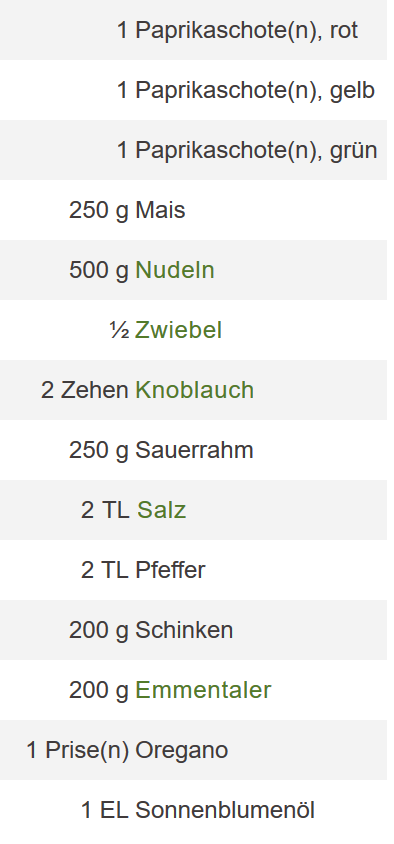

1 paprikaschote(n), rot
1 paprikaschote(n), gelb
1 paprikaschote(n), grün
250 g mais
500 g nudeln
,5  zwiebel
2 zehen knoblauch
250 g sauerrahm
2 tl salz
2 tl pfeffer
200 g schinken
200 g emmentaler
1 prise(n) oregano

1 el sonnenblumenöl
1 paprikaschote(n), rot
1 paprikaschote(n), gelb
1 paprikaschote(n), grün
250 g mais
500 g nudeln
,5  zwiebel
2 zehen knoblauch
250 g sauerrahm
2 tl salz
2 tl pfeffer
200 g schinken
200 g emmentaler
1 prise(n) oregano
1 el sonnenblumenöl
{'paprikaschote(n), rot': ['1.', ''], 'paprikaschote(n), gelb': ['1.', ''], 'paprikaschote(n), grün': ['1.', ''], 'mais': ['250', 'g'], 'nudeln': ['500', 'g'], 'zwiebel': ['.5', ''], 'knoblauch': ['2', 'zehen'], 'sauerrahm': ['250', 'g'], 'salz': ['2', 'tl'], 'pfeffer': ['2', 'tl'], 'schinken': ['200', 'g'], 'emmentaler': ['200', 'g'], 'oregano': ['1', 'prise(n)'], 'sonnenblumenöl': ['1', 'el']}


In [34]:
#display(Image.open("nudelsalat.png"))
#InDict = createIngredientDict(image="nudelsalat.png")
#print(InDict)

In [40]:
#display(Image.open("kuchen.png"))
#InDict = createIngredientDict(image="kuchen.png")
#print(InDict)

{'butter': ['300', 'g'], 'puderzucker': ['', ''], 'mehl': ['300', 'g'], 'vanillezucker': ['1', 'pck.'], 'backpulver': ['.5', 'pck.'], 'ei(er)': ['6', ''], 'salz': ['1', 'prise(n)'], 'zitronensaft': ['1', 'el'], 'apfel': ['1.5', 'kg'], 'kakaopulver': ['50', 'g']}
